In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!pip install -qr requirements.txt
!pip install utils

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


In [ ]:
!mkdir datasets
%cd /content/datasets/

!curl -L "https://public.roboflow.com/ds/VVHgzLnyhe?key=QFYMcIRNIY" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
from glob import glob

train_img_list = glob('./content/yolov5/train/images/*.jpg') + glob('./content/yolov5/train/images/*.jpeg')
valid_img_list = glob('./content/yolov5/valid/images/*.jpg') + glob('./content/yolov5/valid/images/*.jpeg')

with open('./train.txt.', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('./valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
!python /content/yolov5/train.py --img 416 --batch 16 --epochs 100 --data /content/yolov5/data.yaml --weights yolov5x.pt --name test3 --cfg /content/yolov5/models/hub/yolov5m6.yaml

train: weights=yolov5x.pt, cfg=/content/yolov5/models/hub/yolov5m6.yaml, data=/content/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=test3, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, 

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/test32/weights/best.pt --img 416 --conf 0.5 --source /content/yolov5/test.jpeg

detect: weights=['/content/yolov5/runs/train/test32/weights/best.pt'], source=/content/yolov5/test.jpeg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m6 summary: 378 layers, 35254692 parameters, 0 gradients, 49.0 GFLOPs
image 1/1 /content/yolov5/test.jpeg: 320x448 1 CoW, Done. (0.024s)
Speed: 0.4ms pre-process, 24.4ms inference, 1.4ms NMS per image at shape (1, 3, 448, 448)
Results saved to runs/detect/exp4


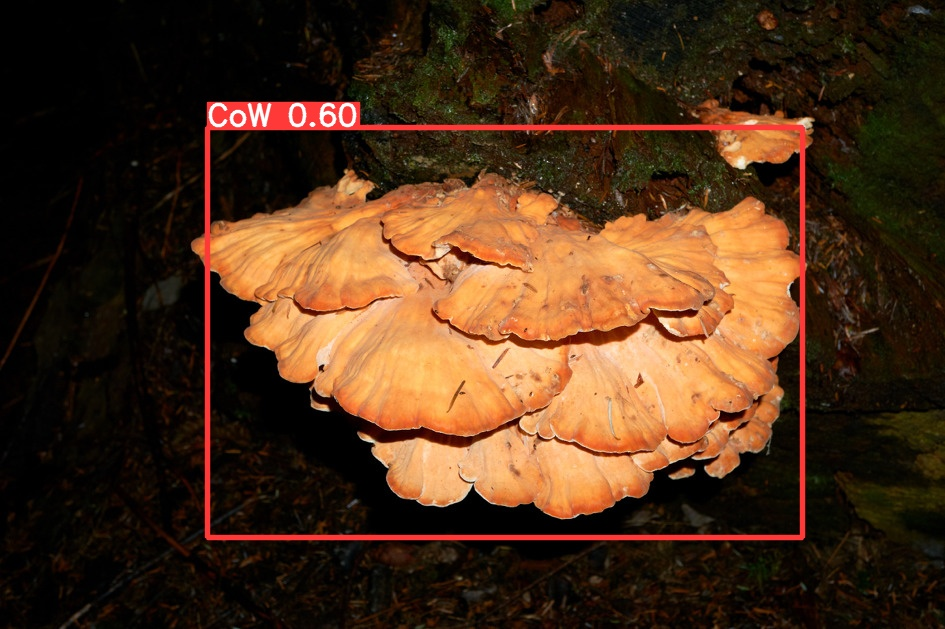

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/yolov5/runs/detect/exp4/test.jpeg')
cv2_imshow(img)